In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import requests
from pandas.io.json import json_normalize

In [88]:
resp = requests.get('https://covid-api.mmediagroup.fr/v1/cases')

In [89]:
data = resp.json()
data

{'Canada': {'All': {'confirmed': 56343,
   'recovered': 22764,
   'deaths': 3537,
   'country': 'Canada',
   'population': 36624199,
   'sq_km_area': 9970610,
   'life_expectancy': '79.4',
   'elevation_in_meters': 487,
   'continent': 'North America',
   'abbreviation': 'CA',
   'location': 'North America',
   'iso': 124,
   'capital_city': 'Ottawa'},
  'Alberta': {'lat': '53.9333',
   'long': '-116.5765',
   'confirmed': 5573,
   'recovered': 0,
   'deaths': 92,
   'updated': 1588411949000},
  'British Columbia': {'lat': '53.7267',
   'long': '-127.6476',
   'confirmed': 2145,
   'recovered': 0,
   'deaths': 112,
   'updated': 1588411949000},
  'Diamond Princess': {'lat': '',
   'long': '',
   'confirmed': 1,
   'recovered': 0,
   'deaths': 1,
   'updated': 1588411949000},
  'Grand Princess': {'lat': '',
   'long': '',
   'confirmed': 13,
   'recovered': 0,
   'deaths': 0,
   'updated': 1588411949000},
  'Manitoba': {'lat': '53.7609',
   'long': '-98.8139',
   'confirmed': 281,
   'r

In [90]:
df_keys = data.keys()
df_keys

dict_keys(['Canada', 'United Kingdom', 'China', 'Netherlands', 'Australia', 'Denmark', 'France', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Hondura

In [91]:
cols = data['Canada']['All'].keys()
cols

dict_keys(['confirmed', 'recovered', 'deaths', 'country', 'population', 'sq_km_area', 'life_expectancy', 'elevation_in_meters', 'continent', 'abbreviation', 'location', 'iso', 'capital_city'])

In [92]:
serialized_data = []
for i, j in enumerate(df_keys):
    temp = []
    for k in cols:
        try:
#             print(data[j]['All'][k])
            temp.append(data[j]['All'][k])
        except:
            print('executed')
            temp.append(np.nan)
    serialized_data.append(temp)

executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
executed
e

In [93]:
df = pd.DataFrame(serialized_data, columns=cols, index=df_keys)

In [94]:
df.head()

,confirmed,recovered,deaths,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city
Canada,56343,22764,3537,Canada,3.662420e+07,9970610.0,79.4,487,North America,CA,North America,124.0,Ottawa
United Kingdom,177454,0,27510,United Kingdom,6.618158e+07,242900.0,77.7,162,Europe,GB,British Isles,826.0,London
China,83959,78581,4637,China,1.409517e+09,9572900.0,71.4,"1,840",Asia,CN,Eastern Asia,156.0,Peking
Netherlands,39791,0,4893,Netherlands,1.703594e+07,41526.0,78.3,30,Europe,NL,Western Europe,528.0,Amsterdam
Australia,6781,5796,93,Australia,2.445056e+07,7741220.0,79.8,330,Oceania,AU,Australia and New Zealand,36.0,Canberra


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Canada to Global
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   confirmed            188 non-null    int64  
 1   recovered            188 non-null    int64  
 2   deaths               188 non-null    int64  
 3   country              174 non-null    object 
 4   population           175 non-null    float64
 5   sq_km_area           173 non-null    float64
 6   life_expectancy      171 non-null    object 
 7   elevation_in_meters  145 non-null    object 
 8   continent            173 non-null    object 
 9   abbreviation         173 non-null    object 
 10  location             173 non-null    object 
 11  iso                  168 non-null    float64
 12  capital_city         173 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 20.6+ KB


In [96]:
df.describe()

,confirmed,recovered,deaths,population,sq_km_area,iso
count,1.880000e+02,1.880000e+02,188.000000,1.750000e+02,1.730000e+02,168.000000
mean,3.570070e+04,1.125029e+04,2541.367021,8.435422e+07,7.465493e+05,428.857143
std,2.585425e+05,7.945849e+04,18377.631948,5.796413e+08,2.005874e+06,256.727617
min,1.000000e+00,0.000000e+00,0.000000,1.000000e+03,4.000000e-01,4.000000
25%,1.032500e+02,2.475000e+01,2.750000,2.890298e+06,3.051800e+04,211.000000
50%,7.755000e+02,2.915000e+02,16.500000,9.721559e+06,1.636100e+05,425.000000
75%,6.735250e+03,1.442000e+03,172.000000,3.070423e+07,5.817300e+05,664.000000
max,3.357450e+06,1.058596e+06,238950.000000,7.444509e+09,1.707540e+07,894.000000


In [97]:
df.isnull().sum()

confirmed               0
recovered               0
deaths                  0
country                14
population             13
sq_km_area             15
life_expectancy        17
elevation_in_meters    43
continent              15
abbreviation           15
location               15
iso                    20
capital_city           15
dtype: int64

In [98]:
df.drop(['country'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Canada to Global
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   confirmed            188 non-null    int64  
 1   recovered            188 non-null    int64  
 2   deaths               188 non-null    int64  
 3   population           175 non-null    float64
 4   sq_km_area           173 non-null    float64
 5   life_expectancy      171 non-null    object 
 6   elevation_in_meters  145 non-null    object 
 7   continent            173 non-null    object 
 8   abbreviation         173 non-null    object 
 9   location             173 non-null    object 
 10  iso                  168 non-null    float64
 11  capital_city         173 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 19.1+ KB


In [103]:
df.dropna(inplace=True)

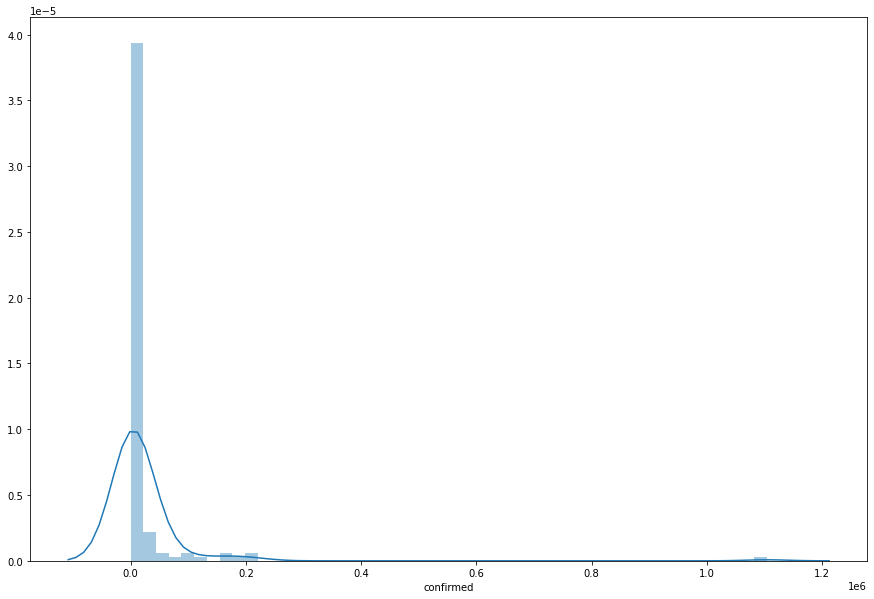

In [120]:
plt.figure(figsize=(15, 10))
sns.distplot(df['confirmed'])

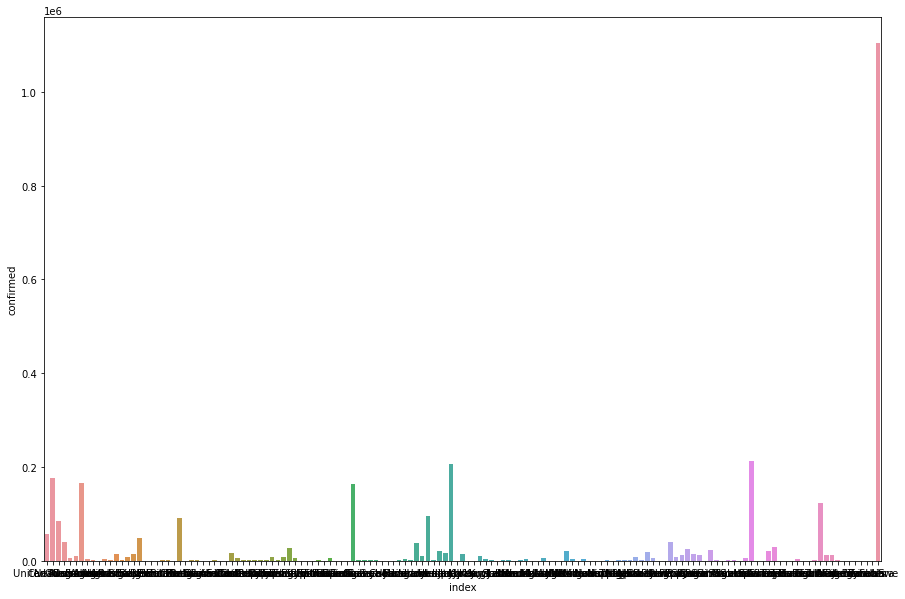

In [126]:
plt.figure(figsize=(15, 10))
sns.barplot(x='index', y='confirmed', data=df.reset_index())

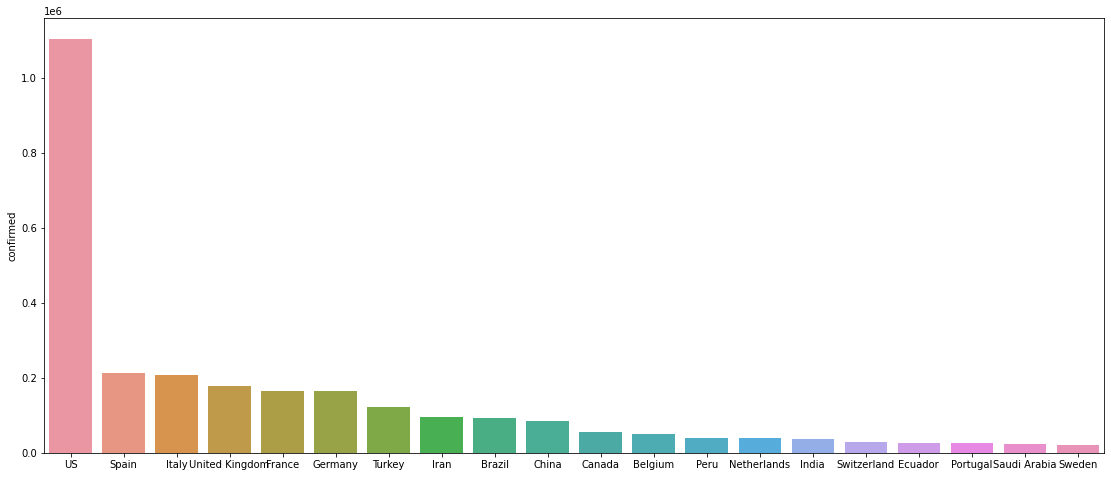

In [148]:
plt.figure(figsize=(19, 8))
highest = df['confirmed'].sort_values(ascending=False).head(20)
sns.barplot(x=highest.index, y=highest)

In [150]:
cf.go_offline()

In [162]:
pd.DataFrame(highest).iplot(kind='bar', asFigure=True)

In [179]:
df.drop(['population', 'confirmed', 'sq_km_area', 'recovered', 'deaths', 'elevation_in_meters'], axis=1).iplot()

In [180]:
df[['deaths', 'confirmed', 'recovered']].iplot(kind='bar')

In [190]:
df[['confirmed', 'recovered', 'deaths']].iplot(kind='histogram', bins=20)

In [192]:
df.drop(['US'], axis=0)[['confirmed', 'recovered', 'deaths']].iplot(kind='scatter')

In [195]:
resp = requests.get('https://covid-api.mmediagroup.fr/v1/history?status=confirmed')
history = resp.json()
history

{'Afghanistan': {'All': {'country': 'Afghanistan',
   'population': 35530081,
   'sq_km_area': 652090,
   'life_expectancy': '45.9',
   'elevation_in_meters': None,
   'continent': 'Asia',
   'abbreviation': 'AF',
   'location': 'Southern and Central Asia',
   'iso': 4,
   'capital_city': 'Kabul',
   'dates': {'2020-05-01': 2335,
    '2020-04-30': 2171,
    '2020-04-29': 1939,
    '2020-04-28': 1828,
    '2020-04-27': 1703,
    '2020-04-26': 1531,
    '2020-04-25': 1463,
    '2020-04-24': 1351,
    '2020-04-23': 1279,
    '2020-04-22': 1176,
    '2020-04-21': 1092,
    '2020-04-20': 1026,
    '2020-04-19': 996,
    '2020-04-18': 933,
    '2020-04-17': 906,
    '2020-04-16': 840,
    '2020-04-15': 784,
    '2020-04-14': 714,
    '2020-04-13': 665,
    '2020-04-12': 607,
    '2020-04-11': 555,
    '2020-04-10': 521,
    '2020-04-09': 484,
    '2020-04-08': 444,
    '2020-04-07': 423,
    '2020-04-06': 367,
    '2020-04-05': 349,
    '2020-04-04': 299,
    '2020-04-03': 281,
    '2020-04-

In [208]:
df_keys=history['Afghanistan']['All']['dates'].keys()
cols = history.keys()
serialized_data = []
for i, j in enumerate(df_keys):
    temp = []
    for k in cols:
        try:
#             print(history[k]['All']['dates'][j])
            temp.append(history[k]['All']['dates'][j])
        except:
            print('executed')
            temp.append(np.nan)
    serialized_data.append(temp)

In [217]:
df = pd.DataFrame(data=serialized_data, index=df_keys, columns=cols)
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Global
2020-05-01,2335,782,4154,745,30,25,4532,2148,6778,15531,...,11,136,37,45,6,16,7,1,15,3340650
2020-04-30,2171,773,4006,745,27,24,4428,2066,6766,15452,...,11,124,37,35,6,14,6,1,15,3253736
2020-04-29,1939,766,3848,743,27,24,4285,1932,6752,15402,...,11,104,36,34,6,8,6,0,0,3169263
2020-04-28,1828,750,3649,743,27,24,4127,1867,6744,15357,...,11,104,36,34,6,8,1,0,0,3094183
2020-04-27,1703,736,3517,743,27,24,4003,1808,6721,15274,...,11,93,36,6,6,4,1,0,0,3020796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,2118
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1434
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,941
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,654


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2020-05-01 to 2020-01-22
Columns: 188 entries, Afghanistan to Global
dtypes: int64(188)
memory usage: 149.1+ KB


In [224]:
df.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Global
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,1.010000e+02
mean,304.920792,184.613861,777.019802,224.138614,6.722772,6.960396,877.594059,423.346535,2288.435644,5124.693069,...,1.940594,12.326733,5.594059,2.336634,1.465347,1.326733,0.376238,0.019802,0.297030,7.614623e+05
std,543.555051,252.232788,1193.567350,295.120790,9.805222,9.676694,1330.186597,609.890965,2846.918019,6335.261350,...,3.454915,29.486983,10.762136,7.337952,2.480179,2.746303,1.121173,0.140014,2.100212,1.018116e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.550000e+02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.122400e+04
50%,7.000000,23.000000,24.000000,1.000000,0.000000,0.000000,19.000000,4.000000,128.000000,302.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.283350e+05
75%,367.000000,377.000000,1423.000000,525.000000,16.000000,15.000000,1554.000000,833.000000,5797.000000,12297.000000,...,3.000000,6.000000,5.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.319505e+06
max,2335.000000,782.000000,4154.000000,745.000000,30.000000,25.000000,4532.000000,2148.000000,6778.000000,15531.000000,...,11.000000,136.000000,37.000000,45.000000,6.000000,16.000000,7.000000,1.000000,15.000000,3.340650e+06


In [252]:
df.iplot()

In [253]:
df[['Global', 'US', 'Italy']].iplot()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f750f964790> (for post_execute):


KeyboardInterrupt: 

In [258]:
df[['Nepal']].iplot()

In [266]:
df['Nepal'].iplot(kind='bar', bins=2)

In [267]:
df['Nepal'].iplot(kind='histogram')

In [276]:
df.iloc[0].iplot(kind='bar')

In [287]:
top20 = df.iloc[0].sort_values(ascending=False).head(20)

In [289]:
top20.iplot(kind='bar')